In [1]:
import os
import sys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.utils import resample
import matplotlib.pyplot as plt

2023-11-27 14:56:49.724044: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 14:56:49.777246: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 14:56:49.777909: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-27 14:56:50.795121: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
mnist_train = pd.read_csv('mnist_train.csv')
mnist_test = pd.read_csv('mnist_test.csv')
x_test = mnist_test.drop('label', axis=1)
y_test = mnist_test['label']
y_test = to_categorical(y_test,num_classes=10)

In [3]:
# Define the number of samples desired for each class in each dataset
samples_per_class = 150

# Initialize two empty DataFrames to store the selected samples for each dataset
selected_data_1 = pd.DataFrame()
selected_data_2 = pd.DataFrame()

# Iterate over each class label
for class_label in range(10):  # 10 classes for digits 0-9
    # Filter data for each class label
    class_data = mnist_train[mnist_train['label'] == class_label]
    
    # Select the first 150 samples for the first dataset
    first_samples = class_data.head(samples_per_class)
    selected_data_1 = pd.concat([selected_data_1, first_samples])
    
    # Select the next 150 samples for the second dataset
    next_samples = class_data.iloc[samples_per_class:samples_per_class*2]
    selected_data_2 = pd.concat([selected_data_2, next_samples])

# Resetting the index for both datasets
selected_data_1 = selected_data_1.reset_index(drop=True)
selected_data_2 = selected_data_2.reset_index(drop=True)
# shuffle the rows of both datasets
selected_data_1 = selected_data_1.sample(frac=1).reset_index(drop=True)
selected_data_2 = selected_data_2.sample(frac=1).reset_index(drop=True)


In [4]:
model_1_train = selected_data_1.drop('label', axis=1)
model_1_label = selected_data_1['label']
model_2_train = selected_data_2.drop('label', axis=1)
model_2_label = selected_data_2['label']
model_1_label = to_categorical(model_1_label,num_classes=10)
model_2_label = to_categorical(model_2_label,num_classes=10)

In [5]:
# Define a common neural network architecture
def create_neural_network(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_dim, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [6]:
model_1=create_neural_network(model_1_train.shape[1], 10)
model_2=create_neural_network(model_2_train.shape[1], 10)

In [7]:
# Train the models
model_1.fit(model_1_train, model_1_label, epochs=30, batch_size=32, validation_split=0.2, verbose=0)
model_2.fit(model_2_train, model_2_label, epochs=30, batch_size=32, validation_split=0.2, verbose=0)

In [8]:
alpha = 0.5
iterations = 50

accuracy_array_1 = []
accuracy_array_2 = []

for i in range(iterations):
    # Get the weights of the models
    weight_1 = model_1.get_weights()
    weight_2 = model_2.get_weights()

    # Calculate the average weights
    blended_weights = [alpha * w0 + (1 - alpha) * w1 for w0, w1 in zip(weight_1, weight_2)]

    # Update the initial models with the averaged weights
    model_1.set_weights(blended_weights)
    model_2.set_weights(blended_weights)
    # Train the models but dont print the logs
    model_1.fit(model_1_train, model_1_label, epochs=5, batch_size=32, validation_split=0.2, verbose=0)
    model_2.fit(model_2_train, model_2_label, epochs=5, batch_size=32, validation_split=0.2, verbose=0)


    # Evaluate the models and dont print the accuracy
    accuracy_1 = model_1.evaluate(x_test, y_test, verbose=0)[1]
    accuracy_2 = model_2.evaluate(x_test, y_test, verbose=0)[1]
    accuracy_array_1.append(accuracy_1)
    accuracy_array_2.append(accuracy_2)
    print(i)


2023-11-27 14:57:04.967283: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 62720000 exceeds 10% of free system memory.
2023-11-27 14:57:05.378888: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 62720000 exceeds 10% of free system memory.


0


2023-11-27 14:57:06.905183: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 62720000 exceeds 10% of free system memory.
2023-11-27 14:57:07.403675: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 62720000 exceeds 10% of free system memory.


1


2023-11-27 14:57:08.854792: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 62720000 exceeds 10% of free system memory.


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


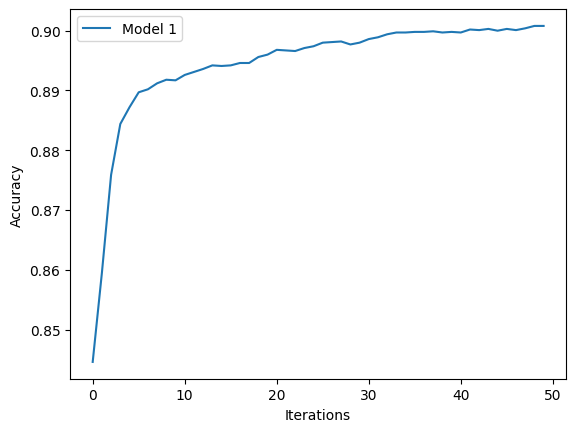

In [11]:
# Plot the accuracies
plt.plot(accuracy_array_1, label='Model 1')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('approach2model1.png')
plt.show()

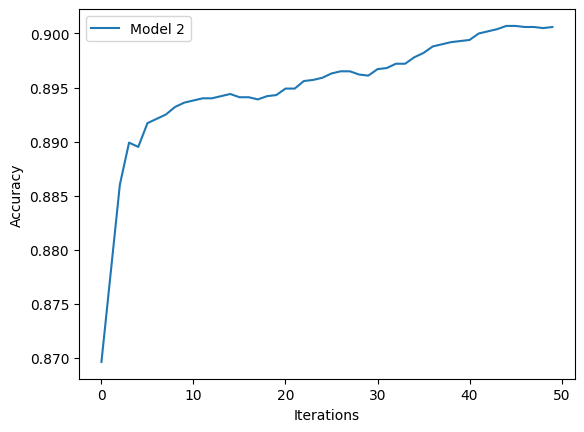

In [12]:
# Plot the accuracies
plt.plot(accuracy_array_2, label='Model 2')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('approach2model2.png')
plt.show()

In [ ]:
# send the accuracies to the txt file
with open('approach2model1.txt', 'w') as f:
    for item in accuracy_array_1:
        f.write("%s\n" % item)
with open('approach2model2.txt', 'w') as f:
    for item in accuracy_array_2:
        f.write("%s\n" % item)
